<a href="https://colab.research.google.com/github/Seong-heum/kics2021/blob/main/ex05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX. 05
[Colab.] https://github.com/Seong-heum/kics2021/blob/main/ex05.ipynb

# 5-1

In [1]:
# https://tutorials.pytorch.kr/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# design CNNs
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [3]:
# define loss
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
print(criterion)
print(optimizer)

CrossEntropyLoss()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [4]:
# load train / test data
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


 bird plane horse truck


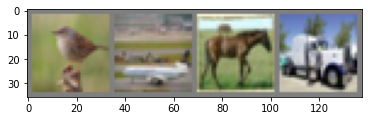

In [5]:
# Let us show some of the training images, for fun
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
# train CNNs
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss: 2.206
[1,  4000] loss: 1.901
[1,  6000] loss: 1.685
[1,  8000] loss: 1.589
[1, 10000] loss: 1.514
[1, 12000] loss: 1.478
[2,  2000] loss: 1.416
[2,  4000] loss: 1.368
[2,  6000] loss: 1.352
[2,  8000] loss: 1.324
[2, 10000] loss: 1.308
[2, 12000] loss: 1.268
Finished Training


In [7]:
# save the CNN model
# PATH = './cifar_net.pth'
# torch.save(net.state_dict(), PATH) # save
# net = Net()
# net.load_state_dict(torch.load(PATH)) # load

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship  ship


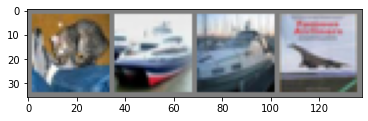

In [8]:
# test CNNs
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# test
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

In [9]:
# evaluation
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of the network on the 10000 test images: 54 %
Accuracy of plane : 54 %
Accuracy of   car : 53 %
Accuracy of  bird : 35 %
Accuracy of   cat : 43 %
Accuracy of  deer : 47 %
Accuracy of   dog : 49 %
Accuracy of  frog : 69 %
Accuracy of horse : 53 %
Accuracy of  ship : 59 %
Accuracy of truck : 75 %


# 5-2

In [10]:
!wget https://www.dropbox.com/s/kvzezksdzkl4zix/vgg.py?dl=0 -O vgg.py

--2021-07-28 01:31:48--  https://www.dropbox.com/s/kvzezksdzkl4zix/vgg.py?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/kvzezksdzkl4zix/vgg.py [following]
--2021-07-28 01:31:48--  https://www.dropbox.com/s/raw/kvzezksdzkl4zix/vgg.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca1cf59aff7df1ab4613594180a.dl.dropboxusercontent.com/cd/0/inline/BTHXNWMaeJ-kcq_TdEpUr7aC6G1on0viAWb5-rQ3c6f9urxxcvgf1-kjU8zAN6KI4haZeiSK82i8au4bdCRgEXFHTY2RykzeAkhiRRlH-rOo0NnNdh6cj1Jk7BMo0Ac1d3cHfya4MyUuN_dxy9ztri1X/file# [following]
--2021-07-28 01:31:49--  https://uca1cf59aff7df1ab4613594180a.dl.dropboxusercontent.com/cd/0/inline/BTHXNWMaeJ-kcq_TdEpUr7aC6G1on0viAWb5-rQ3c6f9urxxcvgf1-kjU8zAN6KI4haZeiSK82i8au4bdCRgEXFHTY2RykzeAkhiRRl

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchvision
import torchvision.transforms as transforms
import os
import argparse
from vgg import *

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch

In [13]:
# Data
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=100, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified


In [14]:
# Model
print('==> Building model..')
net = VGG('VGG19')
net = net.to(device)
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True

==> Building model..


In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

In [16]:
# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        if (batch_idx%5==0): print('[Train] Loss: %.3f | Acc: %.3f%% (%d/%d)' % (train_loss/(batch_idx+1), 100.*correct/total, correct, total))

In [17]:
def test(epoch):
    global best_acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            print('[Test] Loss: %.3f | Acc: %.3f%% (%d/%d)' % (test_loss/(batch_idx+1), 100.*correct/total, correct, total))

#    # Save checkpoint.
#    acc = 100.*correct/total
#    if acc > best_acc:
#        print('Saving..')
#        state = {
#            'net': net.state_dict(),
#            'acc': acc,
#            'epoch': epoch,
#        }
#        if not os.path.isdir('checkpoint'):
#            os.mkdir('checkpoint')
#        torch.save(state, './checkpoint/ckpt.pth')
#        best_acc = acc

In [18]:
for epoch in range(start_epoch, start_epoch+200):
    train(epoch)
    test(epoch)


Epoch: 0
[Train] Loss: 2.365 | Acc: 14.062% (18/128)
[Train] Loss: 4.766 | Acc: 11.589% (89/768)
[Train] Loss: 5.413 | Acc: 11.009% (155/1408)
[Train] Loss: 5.356 | Acc: 10.449% (214/2048)
[Train] Loss: 5.181 | Acc: 10.379% (279/2688)
[Train] Loss: 4.969 | Acc: 10.457% (348/3328)
[Train] Loss: 4.681 | Acc: 10.358% (411/3968)
[Train] Loss: 4.453 | Acc: 10.308% (475/4608)
[Train] Loss: 4.260 | Acc: 10.137% (532/5248)
[Train] Loss: 4.116 | Acc: 10.224% (602/5888)
[Train] Loss: 4.003 | Acc: 10.187% (665/6528)
[Train] Loss: 3.886 | Acc: 10.226% (733/7168)
[Train] Loss: 3.804 | Acc: 10.156% (793/7808)
[Train] Loss: 3.711 | Acc: 10.050% (849/8448)
[Train] Loss: 3.636 | Acc: 10.024% (911/9088)
[Train] Loss: 3.563 | Acc: 10.074% (980/9728)
[Train] Loss: 3.495 | Acc: 10.127% (1050/10368)
[Train] Loss: 3.444 | Acc: 10.056% (1107/11008)
[Train] Loss: 3.386 | Acc: 10.045% (1170/11648)
[Train] Loss: 3.340 | Acc: 9.969% (1225/12288)
[Train] Loss: 3.294 | Acc: 10.002% (1293/12928)
[Train] Loss: 3.250

KeyboardInterrupt: ignored